**OpenViSUS: read from a remote dataset**

To execute this jupyter notebook have to install: OpenViSUS, numpy, matplotlib, ipyvolume

pip3 install numpy matplotlib ipyvolume

You can do it with pip3 (which uses python3):
pip3 install OpenVisus

If the installation of OpenVisus via pip does not work you have to build it and install it yourself (see OpenViSUS README), or add your build directory to the PYTHONPATH, or in your program add it to the sys path before the import:
sys.path.append('/somepath_to_your/OpenVisus/build')


In [2]:
import os,sys

import matplotlib.pyplot as plt
import numpy
from ipywidgets import *

from OpenVisus import *

DbModule.attach()

PythonEngine is working fine


In [5]:
dataset=LoadDataset("http://atlantis.sci.utah.edu/mod_visus?dataset=2kbit1")
    
def readData(
    time=dataset.getDefaultTime(),
    field=dataset.getDefaultField(),
    logic_box=dataset.getLogicBox(),
    resolution=dataset.getMaxResolution()):
    
    access=dataset.createAccess()
    query=BoxQuery(dataset, field, time,ord('r'))
    query.logic_box=logic_box
    query.end_resolutions.push_back(resolution)
    dataset.beginQuery(query)
    dataset.executeQuery(access,query)

    data=Array.toNumPy(query.buffer,bSqueeze=True,bShareMem=False)
    return data

def showData(data):
    fig = plt.figure(figsize = (70,20))
    ax = fig.add_subplot(1,1,1)
    ax.imshow(data, origin='lower')
    plt.show()
    

shape (128, 128) dtype uint8


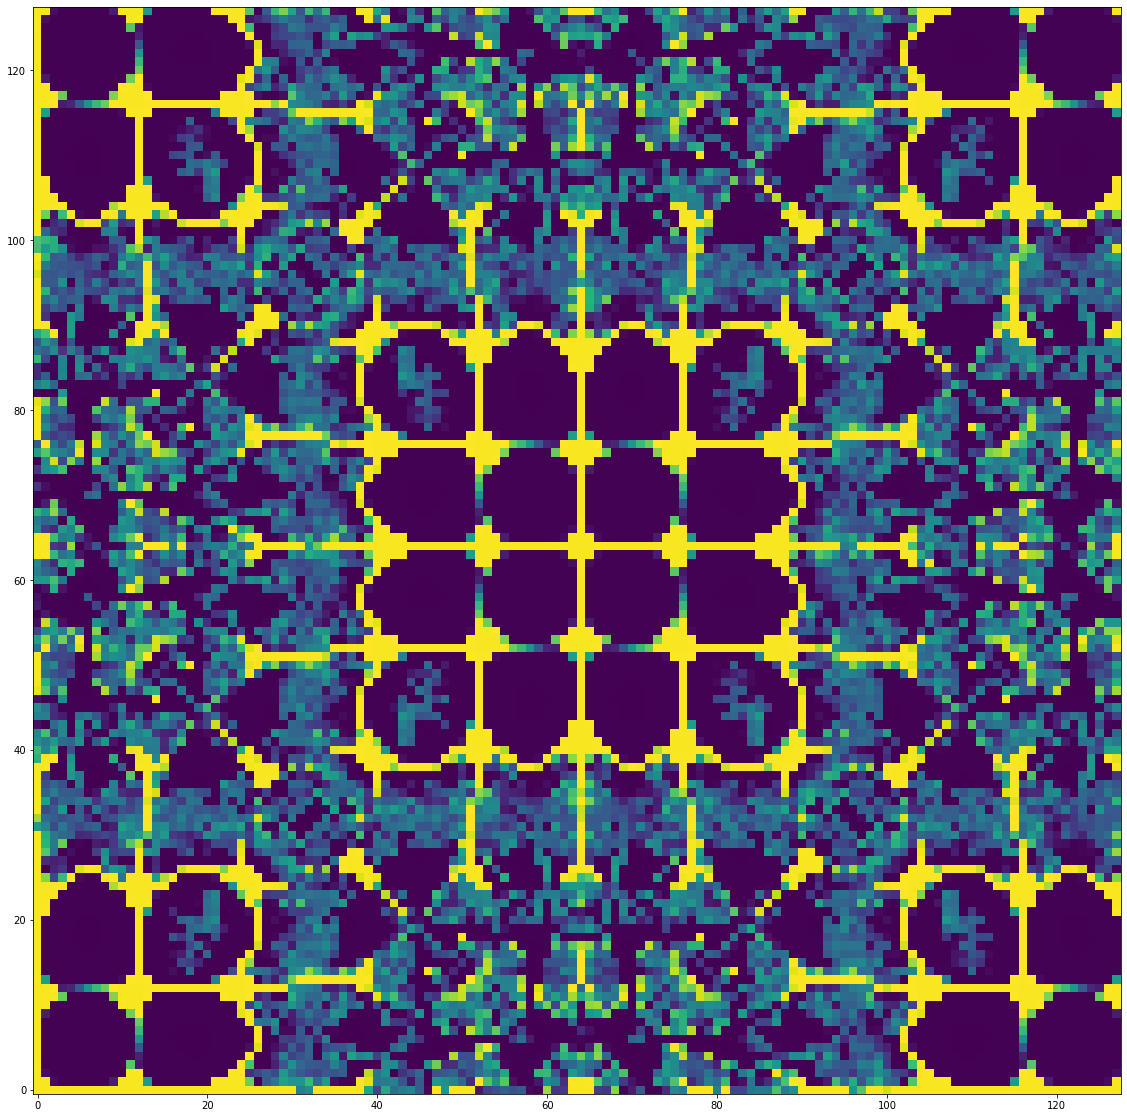

In [6]:
data=readData(logic_box=BoxNi(PointNi(0,0,1024),PointNi(2048,2048,1025)),resolution=21)
#data=numpy.reshape(data,data.shape[0:2]) # YXC drop last component which is the channel (==1)
print("shape",data.shape,"dtype",data.dtype)
#data=readData(resolution=12)
showData(data)